In [18]:
from music21 import common, converter, instrument, chord, note
import glob

In [19]:
midi_path = './midi_songs/'
embed_size=100
rnn_units = 256

# data params
intervals = range(1)
seq_len = 32

# model params
embed_size = 100
rnn_units = 256
use_attention = True

In [84]:
%%time

midi_list = glob.glob(midi_path+'*.mid')
lenth_midi_list = len(midi_list)
err_cnt = 0

notes = []
durations = []

for cnt, i in enumerate (midi_list) :
    try :
        print('전체 {} 파일 중 {} 번째 파일 파싱 중'.format(lenth_midi_list,cnt+1), end='\r')
        notes_temp = converter.parseFile(i)
        
        original_score = converter.parse(i).chordify()
        
        for interval in intervals :

            notes.extend(['START'] * seq_len)
            durations.extend([0]* seq_len)

            for element in notes_temp.flat :
                if isinstance(element, chord.Chord) :
                    notes.append('.'.join(n.nameWithOctave for n in element.pitches))
                    durations.append(element.duration.quarterLength)

                if isinstance(element, note.Note) :
                    if element.isRest:
                        notes.append(str(element.name))
                        durations.append(element.duration.quarterLength)
                    else :
                        notes.append(str(element.nameWithOctave))
                        durations.append(element.duration.quarterLength)
    except Exception as e:
        err_cnt+=1
        print('Parsing Error : ', i)
        print('\t',e)
print('전체 {}개 파일 중 {}개 에러             '.format(lenth_midi_list,err_cnt))

C:\Users\story\anaconda3\lib\site-packages\music21\midi\translate.py:790: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent PROGRAM_CHANGE, track=4, channel=10, data=13>; getting generic UnpitchedPercussion
  warnings.warn(


전체 15개 파일 중 0개 에러             
Wall time: 32.9 s


In [21]:
notes

['START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'START',
 'C#5.E4.A3',
 'D5.B3',
 'C#5.E4.A3',
 'E5.E4.C#4',
 'E5.C#4.E4',
 'B4.E4.G#3',
 'B4.E4.G#3',
 'C#5.A3',
 'B4.G#3.E4',
 'D5.E4.B3',
 'D5.B3.E4',
 'A4.E4.F#3',
 'A4.F#3',
 'E4.F#3',
 'B4.E4.G#3',
 'B4.E4.G#3',
 'B4.G#3',
 'E4.G#3',
 'C#5.A3.E4',
 'E5',
 'B4.D3',
 'D5',
 'C#5',
 'E3',
 'A4',
 'E3',
 'B4.G#4',
 'C#5.E4.A3',
 'B3.D5',
 'C#5.A3.E4',
 'E5.C#4.E4',
 'E5.C#4.E4',
 'E5.C#4.E4',
 'B4.E4',
 'G#3',
 'A3.C#5',
 'B4.G#3',
 'E4',
 'B4.G#3',
 'D5.B3.E4',
 'D5',
 'B3.E4',
 'A4',
 'E4.F#3',
 'A4',
 'E4.F#3',
 'B4',
 'E4.G#3',
 'C#5.A3',
 'E4.A3',
 'D5.D3',
 'F#4.B4',
 'C#5.E4.A4',
 'E3',
 'B4.E2.G#4',
 'D4',
 'A4.A2.E4.C#4',
 'C#5.A3.E4',
 'C#5.A3.E4',
 'B3.D5',
 'C#5.A3.E

In [39]:
durations

[0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.75,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.75,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.75,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.75,
 2.75,
 0.75,
 0.75,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.75,
 0.75,
 0.5,
 2.75,
 0.5,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.

In [85]:
notes_set = sorted(set(notes))
n_notes = len(notes_set)

durations_set = sorted(set(durations))
n_durations = len(durations_set)

In [86]:
def create_dictionary(element_names):
    element_to_int = {}
    int_to_element = {}
    
    for cnt, elem in enumerate(element_names) :
        element_to_int[elem] = cnt
        int_to_element[cnt] = elem
    
    return (element_to_int, int_to_element)

In [87]:
element_to_int, int_to_element = create_dictionary(notes_set)
duration_to_int, int_to_duration = create_dictionary(durations_set)

In [88]:
from tensorflow.keras.utils import to_categorical
import numpy as np

notes_network_input = []
notes_network_output = []
durations_network_input = []
durations_network_output = []

for i in range(len(notes) - seq_len):
    notes_sequence_in = notes[i:i + seq_len]
    notes_sequence_out = notes[i + seq_len]
    notes_network_input.append([element_to_int[char] for char in notes_sequence_in])
    notes_network_output.append(element_to_int[notes_sequence_out])

    durations_sequence_in = durations[i:i + seq_len]
    durations_sequence_out = durations[i + seq_len]
    durations_network_input.append([duration_to_int[char] for char in durations_sequence_in])
    durations_network_output.append(duration_to_int[durations_sequence_out])

n_patterns = len(notes_network_input)

# reshape
notes_network_input = np.reshape(notes_network_input, (n_patterns, seq_len))
durations_network_input = np.reshape(durations_network_input, (n_patterns, seq_len))
network_input = [notes_network_input, durations_network_input]

notes_network_output = to_categorical(notes_network_output, num_classes=n_notes)
durations_network_output = to_categorical(durations_network_output, num_classes=n_durations)
network_output = [notes_network_output, durations_network_output]


In [89]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Embedding

notes_in = Input(shape = (None,))
durations_in = Input(shape = (None,))

x1 = Embedding(n_notes, embed_size)(notes_in)
x2 = Embedding(n_durations, embed_size)(durations_in)

In [90]:
from tensorflow.keras.layers import Concatenate, LSTM, Dense, Reshape, Activation, Permute, Multiply, Lambda, RepeatVector
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K


x = Concatenate()([x1,x2])

x = LSTM(rnn_units, return_sequences=True)(x)
x = LSTM(rnn_units, return_sequences=True)(x)

e = Dense(1, activation='tanh')(x)
e = Reshape([-1])(e)

alpha = Activation('softmax')(e)

c = Permute([2,1])(RepeatVector(rnn_units)(alpha))
c = Multiply()([x,c])
c = Lambda(lambda xin: K.sum(xin, axis=1), output_shape=(rnn_units,))(c)

notes_out = Dense(n_notes, activation = 'softmax', name = 'pitch')(c)
durations_out = Dense(n_durations, activation = 'softmax', name = 'duration')(c)

model = Model([notes_in, durations_in], [notes_out, durations_out])

att_model = Model([notes_in, durations_in], alpha)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy'], optimizer=RMSprop(learning_rate=0.001))


In [91]:
from tensorflow.keras.utils import plot_model
import os

plot_model(model, to_file=os.path.join('model.png'), show_shapes = True, show_layer_names = True)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, None, 100)    60600       ['input_9[0][0]']                
                                                                                                  
 embedding_9 (Embedding)        (None, None, 100)    2600        ['input_10[0][0]']               
                                                                                            

In [92]:
weights_folder = os.path.join('weights')
# model.load_weights(os.path.join(weights_folder, "weights.h5"))

In [93]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint1 = ModelCheckpoint(
    os.path.join(weights_folder, "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

checkpoint2 = ModelCheckpoint(
    os.path.join(weights_folder, "weights.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='loss'
    , restore_best_weights=True
    , patience = 10
)


callbacks_list = [
    checkpoint1
    , checkpoint2
    , early_stopping
 ]

model.save_weights(os.path.join(weights_folder, "weights.h5"))
history = model.fit(network_input, network_output
          , epochs=2000000, batch_size=32
          , validation_split = 0.2
          , callbacks=callbacks_list
          , shuffle=True
         )



Epoch 1/2000000
374/374 [==============================] - 9s 18ms/step - loss: 5.9234 - pitch_loss: 4.3699 - duration_loss: 1.5535 - val_loss: 6.4333 - val_pitch_loss: 5.0872 - val_duration_loss: 1.3461
Epoch 2/2000000
374/374 [==============================] - 6s 16ms/step - loss: 5.3748 - pitch_loss: 4.0007 - duration_loss: 1.3741 - val_loss: 6.4404 - val_pitch_loss: 5.1417 - val_duration_loss: 1.2987
Epoch 3/2000000
374/374 [==============================] - 6s 16ms/step - loss: 5.1939 - pitch_loss: 3.8737 - duration_loss: 1.3202 - val_loss: 6.4991 - val_pitch_loss: 5.1794 - val_duration_loss: 1.3197
Epoch 4/2000000
374/374 [==============================] - 6s 17ms/step - loss: 5.0745 - pitch_loss: 3.7953 - duration_loss: 1.2792 - val_loss: 6.4642 - val_pitch_loss: 5.0830 - val_duration_loss: 1.3812
Epoch 5/2000000
374/374 [==============================] - 6s 16ms/step - loss: 4.9520 - pitch_loss: 3.7149 - duration_loss: 1.2371 - val_loss: 6.6809 - val_pitch_loss: 5.2822 - val_du

Epoch 41/2000000
374/374 [==============================] - 6s 16ms/step - loss: 1.4484 - pitch_loss: 1.2412 - duration_loss: 0.2072 - val_loss: 10.1960 - val_pitch_loss: 7.4319 - val_duration_loss: 2.7641
Epoch 42/2000000
374/374 [==============================] - 6s 16ms/step - loss: 1.4097 - pitch_loss: 1.2047 - duration_loss: 0.2050 - val_loss: 10.4287 - val_pitch_loss: 7.5934 - val_duration_loss: 2.8352
Epoch 43/2000000
374/374 [==============================] - 6s 16ms/step - loss: 1.3697 - pitch_loss: 1.1854 - duration_loss: 0.1843 - val_loss: 10.5162 - val_pitch_loss: 7.6379 - val_duration_loss: 2.8782
Epoch 44/2000000
374/374 [==============================] - 6s 16ms/step - loss: 1.3420 - pitch_loss: 1.1577 - duration_loss: 0.1843 - val_loss: 10.5085 - val_pitch_loss: 7.5957 - val_duration_loss: 2.9128
Epoch 45/2000000
374/374 [==============================] - 6s 17ms/step - loss: 1.2954 - pitch_loss: 1.1263 - duration_loss: 0.1691 - val_loss: 10.5787 - val_pitch_loss: 7.608

Epoch 81/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.5959 - pitch_loss: 0.5342 - duration_loss: 0.0616 - val_loss: 12.0204 - val_pitch_loss: 8.3452 - val_duration_loss: 3.6753
Epoch 82/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.5867 - pitch_loss: 0.5272 - duration_loss: 0.0595 - val_loss: 12.5350 - val_pitch_loss: 8.4946 - val_duration_loss: 4.0404
Epoch 83/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.5732 - pitch_loss: 0.5140 - duration_loss: 0.0591 - val_loss: 12.1933 - val_pitch_loss: 8.3461 - val_duration_loss: 3.8472
Epoch 84/2000000
374/374 [==============================] - 6s 17ms/step - loss: 0.5721 - pitch_loss: 0.5119 - duration_loss: 0.0602 - val_loss: 12.3464 - val_pitch_loss: 8.4432 - val_duration_loss: 3.9031
Epoch 85/2000000
374/374 [==============================] - 6s 17ms/step - loss: 0.5615 - pitch_loss: 0.5017 - duration_loss: 0.0598 - val_loss: 12.5855 - val_pitch_loss: 8.465

Epoch 121/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.3614 - pitch_loss: 0.3204 - duration_loss: 0.0410 - val_loss: 12.7391 - val_pitch_loss: 8.4962 - val_duration_loss: 4.2429
Epoch 122/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.3598 - pitch_loss: 0.3151 - duration_loss: 0.0446 - val_loss: 12.9500 - val_pitch_loss: 8.5431 - val_duration_loss: 4.4069
Epoch 123/2000000
374/374 [==============================] - 6s 17ms/step - loss: 0.3441 - pitch_loss: 0.3094 - duration_loss: 0.0346 - val_loss: 13.0298 - val_pitch_loss: 8.5846 - val_duration_loss: 4.4453
Epoch 124/2000000
374/374 [==============================] - 6s 17ms/step - loss: 0.3389 - pitch_loss: 0.3011 - duration_loss: 0.0378 - val_loss: 13.2832 - val_pitch_loss: 8.6868 - val_duration_loss: 4.5965
Epoch 125/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.3486 - pitch_loss: 0.3078 - duration_loss: 0.0408 - val_loss: 13.2528 - val_pitch_loss: 

Epoch 200/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.1689 - pitch_loss: 0.1364 - duration_loss: 0.0325 - val_loss: 14.5520 - val_pitch_loss: 9.3744 - val_duration_loss: 5.1776
Epoch 201/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.1703 - pitch_loss: 0.1382 - duration_loss: 0.0321 - val_loss: 14.6500 - val_pitch_loss: 9.3906 - val_duration_loss: 5.2593
Epoch 202/2000000
374/374 [==============================] - 6s 17ms/step - loss: 0.1685 - pitch_loss: 0.1350 - duration_loss: 0.0336 - val_loss: 14.6657 - val_pitch_loss: 9.3904 - val_duration_loss: 5.2753
Epoch 203/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.1590 - pitch_loss: 0.1324 - duration_loss: 0.0266 - val_loss: 14.4995 - val_pitch_loss: 9.3498 - val_duration_loss: 5.1497
Epoch 204/2000000
374/374 [==============================] - 6s 16ms/step - loss: 0.1610 - pitch_loss: 0.1329 - duration_loss: 0.0280 - val_loss: 14.5385 - val_pitch_loss: 

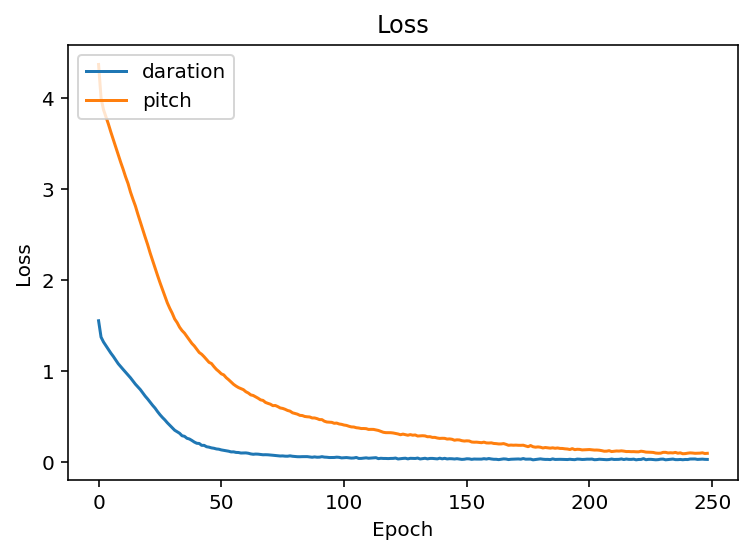

In [94]:
import matplotlib.pyplot as plt 

# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['duration_loss'])
plt.plot(history.history['pitch_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['daration', 'pitch'], loc='upper left')
plt.show()


In [31]:
print(history.history)

{'loss': [6.765229225158691, 6.215900421142578, 5.920010566711426, 5.707823753356934, 5.5374064445495605, 5.43160343170166, 5.33577823638916, 5.243731498718262, 5.160684585571289, 5.068362236022949, 4.987104892730713, 4.9031267166137695, 4.814057350158691, 4.726696014404297, 4.645473957061768, 4.556966781616211, 4.467692852020264, 4.378345012664795, 4.267643451690674, 4.177445411682129, 4.073130130767822, 3.973428726196289, 3.8677892684936523, 3.758958101272583, 3.6479499340057373, 3.52673077583313, 3.4165682792663574, 3.297013521194458, 3.170616626739502, 3.059001922607422, 2.928821563720703, 2.7949156761169434, 2.6832849979400635, 2.5558736324310303, 2.4456794261932373, 2.3082029819488525, 2.1762144565582275, 2.0635006427764893, 1.9486356973648071, 1.8482078313827515, 1.756967544555664, 1.6451016664505005, 1.549215316772461, 1.4641600847244263, 1.3729238510131836, 1.3257904052734375, 1.2421773672103882, 1.1854087114334106, 1.1239193677902222, 1.069790005683899, 1.0229828357696533, 0.

In [14]:
from tensorflow.python.keras.models import load_model
model = load_model(os.path.join(weights_folder,'weights-improvement-84-2.1283-bigger.h5'))

OSError: SavedModel file does not exist at: weights\weights-improvement-84-2.1283-bigger.h5\{saved_model.pbtxt|saved_model.pb}

In [ ]:
model.summary()

In [ ]:
model

In [95]:
# prediction params
notes_temp=0.5
duration_temp = 0.5
max_extra_notes = 100
max_seq_len = 32
seq_len = 32

# notes = ['START', 'D3', 'D3', 'E3', 'D3', 'G3', 'F#3','D3', 'D3', 'E3', 'D3', 'G3', 'F#3','D3', 'D3', 'E3', 'D3', 'G3', 'F#3','D3', 'D3', 'E3', 'D3', 'G3', 'F#3']
# durations = [0, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2]


# notes = ['START', 'F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3','F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3', 'F#3', 'G#3', 'F#3', 'E3']
# durations = [0, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2, 0.75, 0.25, 1, 1, 1, 2]


gen_notes = ['START']
gen_durations = [0]
 
if seq_len is not None:
    gen_notes = ['START'] * (seq_len - len(gen_notes)) + gen_notes
    gen_durations = [0] * (seq_len - len(gen_durations)) + gen_durations


sequence_length = len(gen_notes)

prediction_output = []
notes_input_sequence = []
durations_input_sequence = []

overall_preds = []

In [96]:
def sample_with_temp(preds, temperature):

    if temperature == 0:
        return np.argmax(preds)
    else:
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        return np.random.choice(len(preds), p=preds)

In [97]:
notes_prediction, durations_prediction = model.predict(prediction_input, verbose=1)

1/1 [==============================] - 1s 516ms/step


In [98]:
len(notes_prediction[0])

606

In [99]:
from music21 import note

for n, d in zip(gen_notes,gen_durations):
    gen_note_int = element_to_int[n]
    gen_duration_int = duration_to_int[d]
    
    notes_input_sequence.append(gen_note_int)
    durations_input_sequence.append(gen_duration_int)
    
    prediction_output.append([n, d])
    
    if n != 'START' :
        #print('n : ',n)
        midi_note = note.Note(n)

        new_note = np.zeros(128)
        new_note[midi_note.pitch.midi] = 1
        overall_preds.append(new_note)


    att_matrix = np.zeros(shape = (max_extra_notes+sequence_length, max_extra_notes))

for note_index in range(max_extra_notes):

    prediction_input = [np.array([notes_input_sequence])
                        , np.array([durations_input_sequence])]

    notes_prediction, durations_prediction = model.predict(prediction_input, verbose=0)
    if use_attention:
        att_prediction = att_model.predict(prediction_input, verbose=0)[0]
#         print('len(att_prediction) : ', len(att_prediction))
#         print('att_prediction : ', att_prediction)
#         print('note_index : ',note_index)
        att_matrix[(note_index-len(att_prediction)+sequence_length):(note_index+sequence_length), note_index] = att_prediction
    
    new_note = np.zeros(128)
    
    for idx, n_i in enumerate(notes_prediction[0]):
        try:
            #print(idx)
            note_name = int_to_element[idx]
            midi_note = note.Note(note_name)
            new_note[midi_note.pitch.midi] = n_i
            
        except:
            pass
#             print('ERROR : notes_prediction')
        
    overall_preds.append(new_note)
            
    
    i1 = sample_with_temp(notes_prediction[0], notes_temp)
    i2 = sample_with_temp(durations_prediction[0], duration_temp)
    

    note_result = int_to_element[i1]
    duration_result = int_to_duration[i2]
    
    prediction_output.append([note_result, duration_result])

    notes_input_sequence.append(i1)
    durations_input_sequence.append(i2)
    
    if len(notes_input_sequence) > max_seq_len:
        notes_input_sequence = notes_input_sequence[1:]
        durations_input_sequence = durations_input_sequence[1:]
        
#     print(note_result)
#     print(duration_result)
        
    if note_result == 'START':
        break

overall_preds = np.transpose(np.array(overall_preds)) 
print('Generated sequence of {} notes'.format(len(prediction_output)))

Generated sequence of 132 notes


In [38]:
int_to_element

{0: 'A2',
 1: 'A2.A3.A4',
 2: 'A2.A3.A4.E4',
 3: 'A2.A3.E4',
 4: 'A2.A4.A3',
 5: 'A2.C#4',
 6: 'A2.E4',
 7: 'A2.E4.C#4',
 8: 'A2.G#4.E4',
 9: 'A3',
 10: 'A3.A2',
 11: 'A3.A2.A4.E4',
 12: 'A3.A4.E4',
 13: 'A3.A5',
 14: 'A3.B3',
 15: 'A3.C#4',
 16: 'A3.C#5',
 17: 'A3.C#5.E4',
 18: 'A3.E4',
 19: 'A3.E4.A4.A2',
 20: 'A3.E5',
 21: 'A4',
 22: 'A4.A2.C#4.E4',
 23: 'A4.A2.E4',
 24: 'A4.A2.E4.C#4',
 25: 'A4.A3',
 26: 'A4.A3.A2',
 27: 'A4.A3.C#4',
 28: 'A4.A3.E4',
 29: 'A4.A3.E4.A2',
 30: 'A4.C#4',
 31: 'A4.C#4.A2.E4',
 32: 'A4.C#4.A3',
 33: 'A4.C#4.C#3',
 34: 'A4.C#4.E3',
 35: 'A4.C#4.E4',
 36: 'A4.C#4.E4.A2',
 37: 'A4.C#5',
 38: 'A4.C#5.E4',
 39: 'A4.E-4',
 40: 'A4.E-4.F#3',
 41: 'A4.E3',
 42: 'A4.E3.C#4',
 43: 'A4.E4',
 44: 'A4.E4.A2',
 45: 'A4.E4.A2.A3',
 46: 'A4.E4.A2.C#4',
 47: 'A4.E4.A3',
 48: 'A4.E4.A3.A2',
 49: 'A4.E4.C#4',
 50: 'A4.E4.C#4.A2',
 51: 'A4.E4.F#3',
 52: 'A4.F#3',
 53: 'A4.F#3.E-4',
 54: 'A4.F#3.E4',
 55: 'A5',
 56: 'A5.A3',
 57: 'A5.B5',
 58: 'B-4',
 59: 'B2',
 60: 'B2.B3'

In [176]:
len(overall_preds)

128

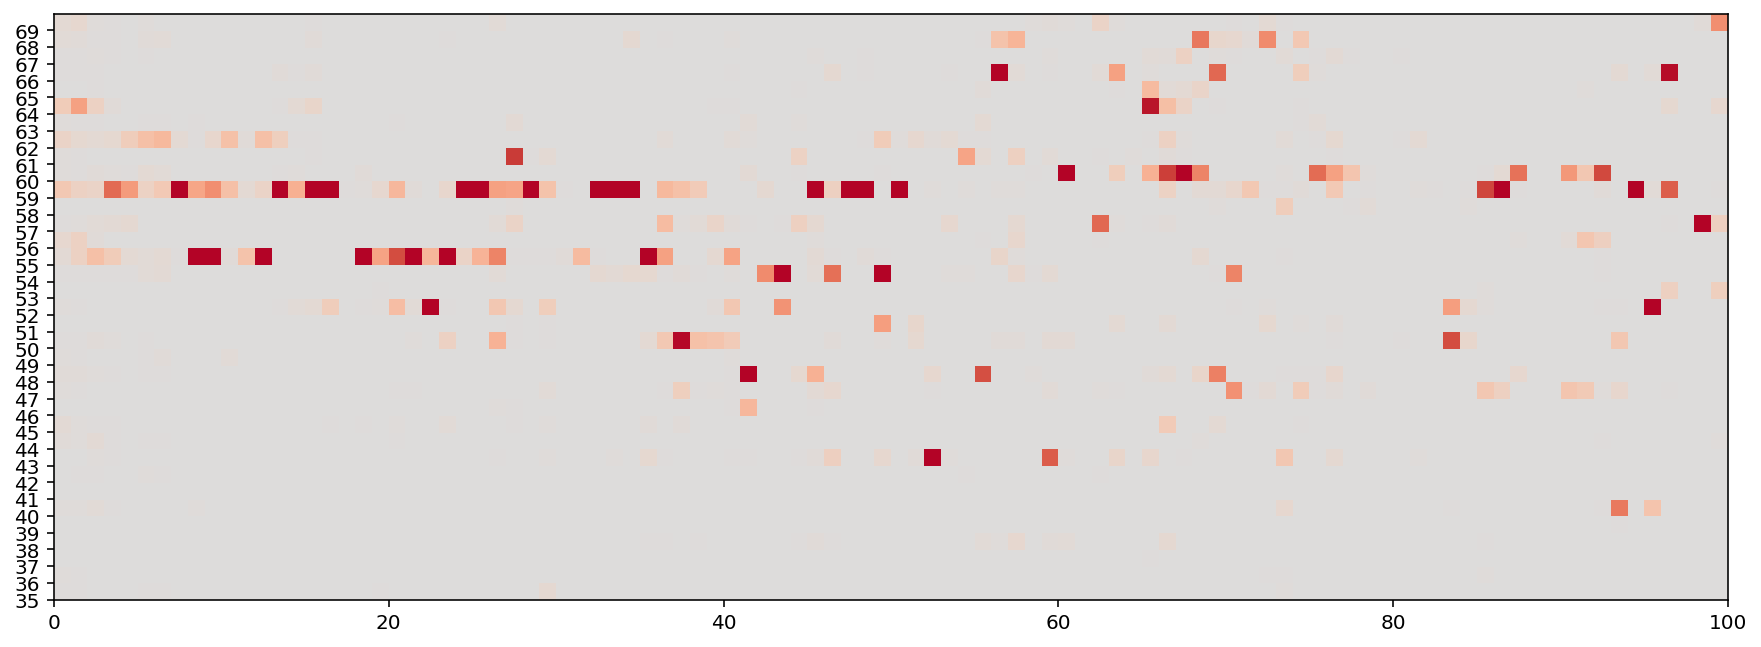

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.set_yticks([int(j) for j in range(35,70)])

plt.imshow(overall_preds[35:70,:], origin="lower", cmap='coolwarm', vmin = -0.5, vmax = 0.5, extent=[0, max_extra_notes, 35,70])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

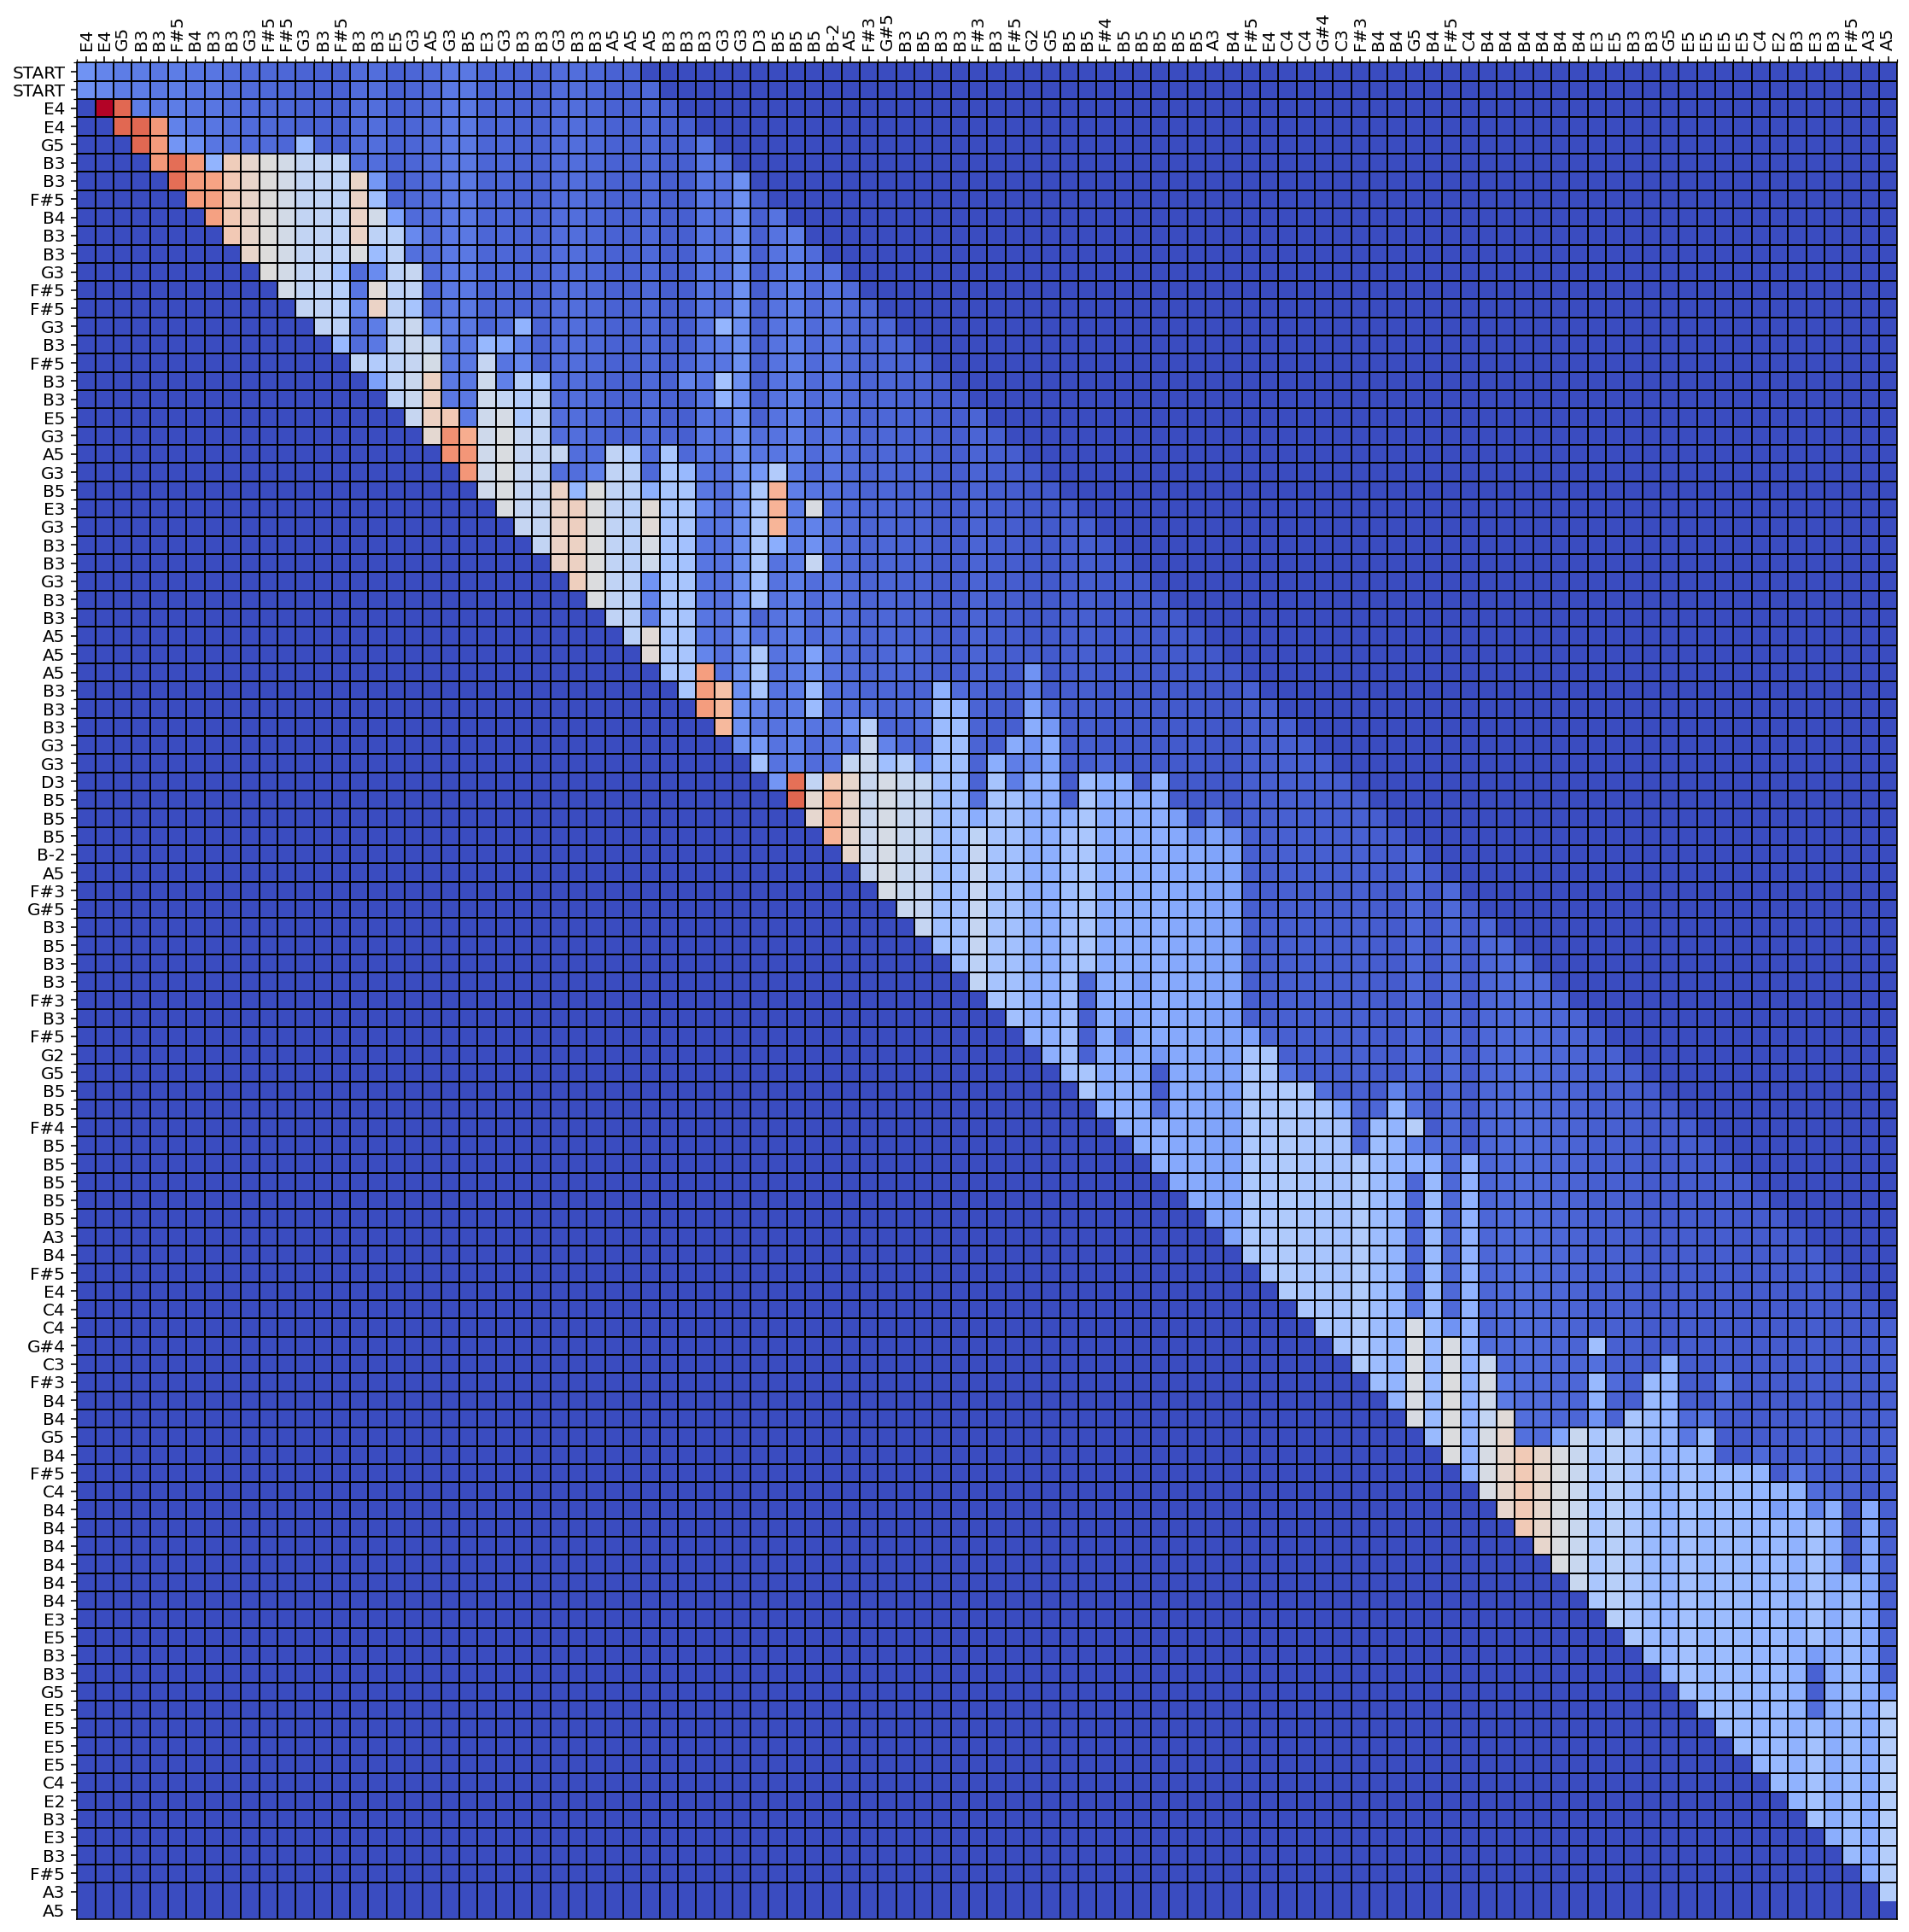

In [101]:
fig, ax = plt.subplots(figsize = (20,20))
    
im = ax.imshow(att_matrix[(seq_len-2):,],  #//30행부터 출력?
                cmap = 'coolwarm', interpolation = 'nearest') #coolwarm cmap과 nearest 보간

    
#// minor ticks 지정함(-0.5부터 1간격으로 쭉?)
ax.set_xticks(np.arange(-.5, len(prediction_output)- seq_len, 1), minor=True);
ax.set_yticks(np.arange(-.5, len(prediction_output)- seq_len, 1), minor=True);

#//그리드(격자) minor ticks 기반으로
ax.grid(which='minor', color='black',linestyle='-',linewidth=1)
    
#// We want to show all ticks...
ax.set_xticks(np.arange(len(prediction_output) - seq_len))
ax.set_yticks(np.arange(len(prediction_output)- seq_len+2))

##★// 해당 음표 라벨링해줌 (x축과 y축에)  [prediction_output 이용]
##// y축은 두단계 전임 (예측을 위한 자료니까)
#// ... and label them with the respective list entries
ax.set_xticklabels([n[0] for n in prediction_output[(seq_len):]])
ax.set_yticklabels([n[0] for n in prediction_output[(seq_len - 2):]])

ax.xaxis.tick_top()

plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va = "center",
        rotation_mode="anchor")


In [102]:
from music21.stream.base import Stream
from music21 import duration
import time

output_folder = os.path.join('output')

midi_stream = Stream()

# create note and chord objects based on the values generated by the model
for pattern in prediction_output:
    note_pattern, duration_pattern = pattern
    # pattern is a chord
    if ('.' in note_pattern):
        notes_in_chord = note_pattern.split('.')
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(current_note)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        midi_stream.append(new_chord)
    elif note_pattern == 'rest':
    # pattern is a rest
        new_note = note.Rest()
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)
    elif note_pattern != 'START':
    # pattern is a note
        new_note = note.Note(note_pattern)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)



midi_stream = midi_stream.chordify()
timestr = time.strftime("%Y%m%d-%H%M%S")
midi_stream.write('midi', fp=os.path.join(output_folder, 'output-' + timestr + '.mid'))

'output\\output-20211126-020252.mid'

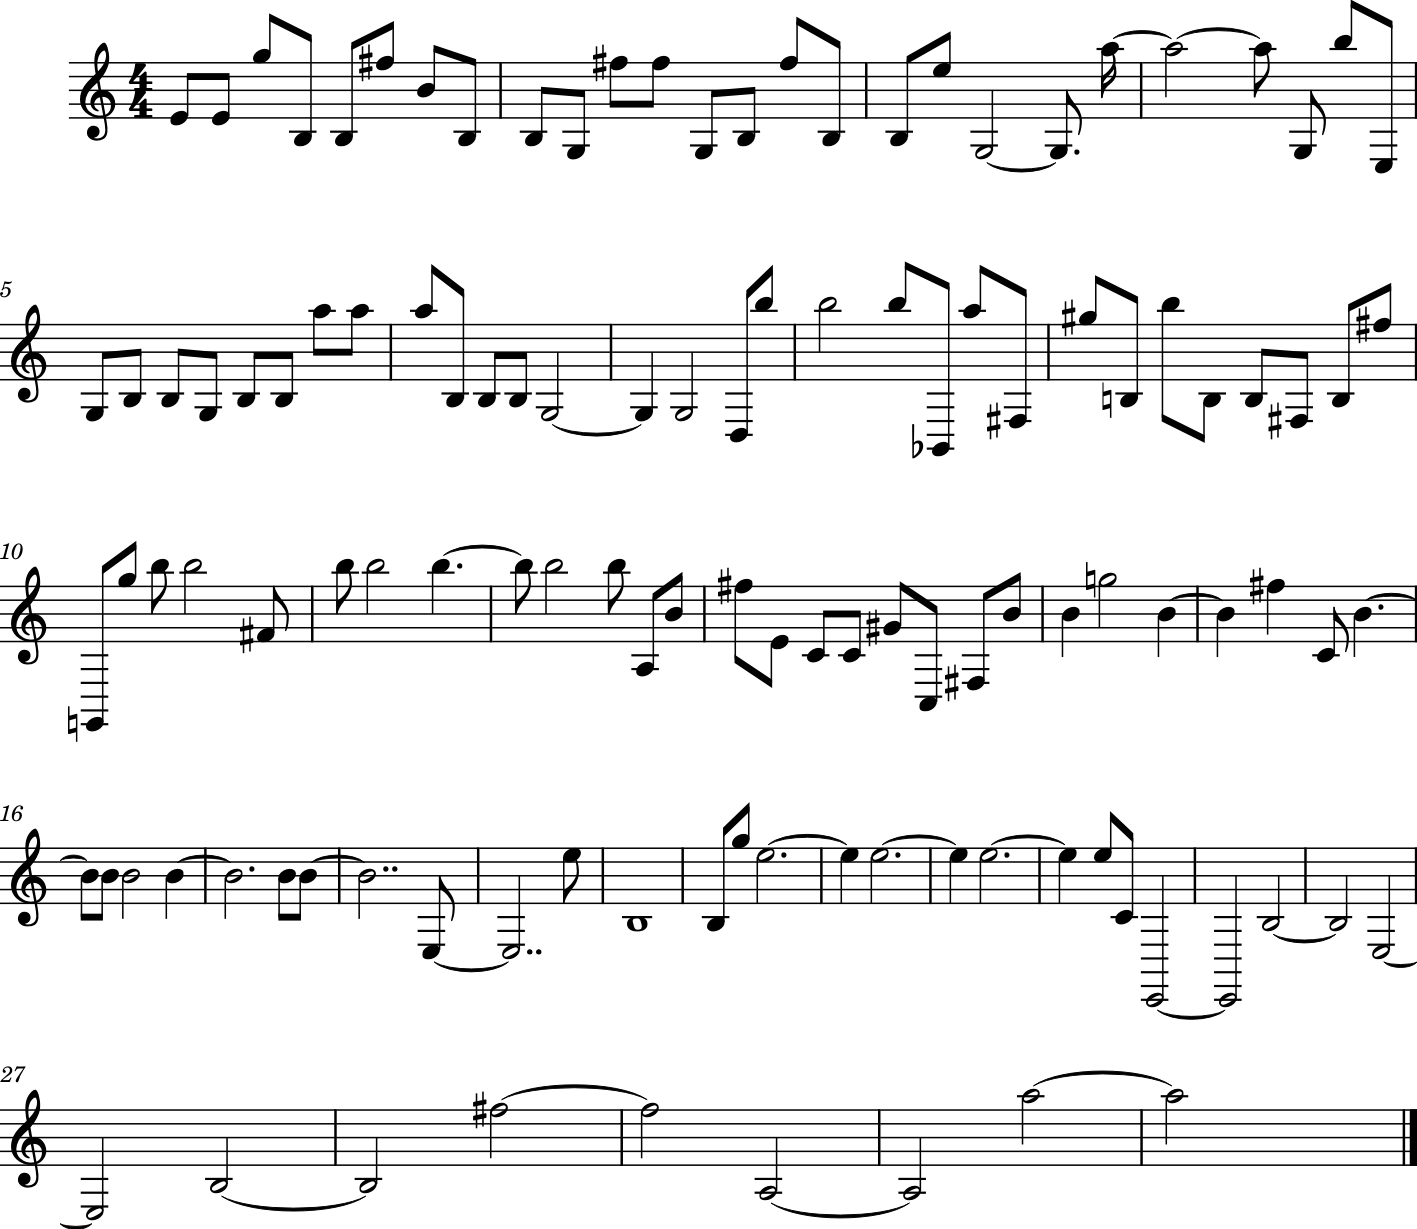

In [103]:
midi_stream.show()

In [43]:
from music21 import environment

us = environment.Environment()    
us['musescoreDirectPNGPath'] = 'C:/Program Files/MuseScore 3/bin/MuseScore3.exe'